In [367]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [368]:
df = pd.read_csv('/content/cancer dataset.csv')

In [369]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [371]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [372]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<Axes: xlabel='diagnosis', ylabel='count'>

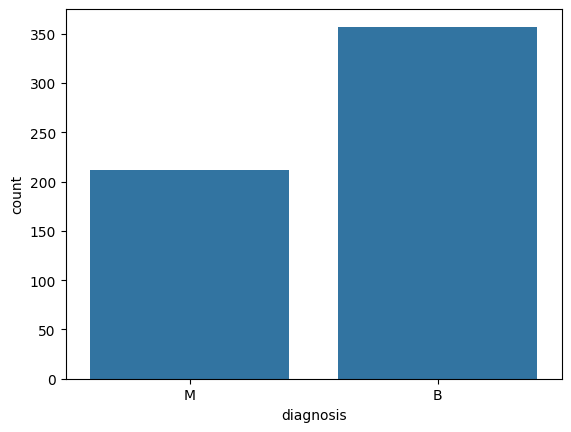

In [373]:
sns.countplot(x='diagnosis',data=df)

In [374]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

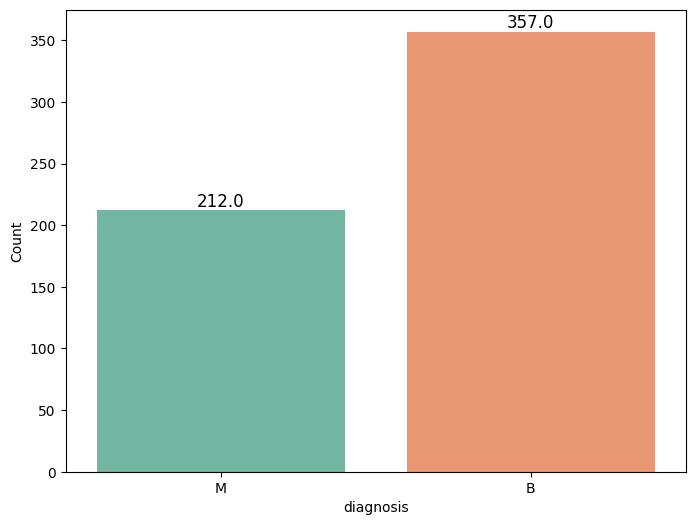

In [375]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


In [376]:
x = df.drop('diagnosis',axis=1)

In [377]:
y = df[['diagnosis']]

# Train Test Split

In [378]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=.30)

In [379]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [380]:
ytest.shape

(171, 1)

In [381]:
xtest.shape

(171, 30)

# Test and Validation

In [382]:
x_test, x_val, y_test, y_val = train_test_split(xtest, ytest, random_state=42, test_size=.50)
x_test.shape #15% of total data

(85, 30)

In [383]:
x_val.shape #15% of total data ; for hyper param tuning

(86, 30)

# Step 3: Decision Tree model and evaluation

In [384]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [385]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Decision Tree model performance

In [386]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.935672514619883 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



# Step 4: Random Forest model and evaluation

In [387]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [388]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

# Evaluate Random Forest model performance

In [389]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Pre - Pruning for Cost Complexity

# Initialized Hyperparameters

In [390]:
# Define hyperparameters for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12, 15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5]
}


#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 151, 201, 251, 301],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,810],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [391]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42),
                              param_grid = dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 12, 15, 20, 25,
                                       28],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [392]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.03001733, 0.01735983, 0.0192872 , ..., 0.00486135, 0.00791187,
        0.00430508]),
 'std_fit_time': array([0.00917578, 0.00998407, 0.00881968, ..., 0.00095404, 0.00049697,
        0.00075392]),
 'mean_score_time': array([0.02789092, 0.02219114, 0.00956612, ..., 0.00549088, 0.00468197,
        0.00428524]),
 'std_score_time': array([1.39416757e-02, 9.43651672e-03, 2.89969238e-03, ...,
        1.38855902e-03, 9.46932567e-05, 1.05141199e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 28, 28, 28],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 5, 5, 5],
              mask=

In [393]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030017,0.009176,0.027891,0.013942,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
1,0.017360,0.009984,0.022191,0.009437,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,334
2,0.019287,0.008820,0.009566,0.002900,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1569
3,0.014642,0.003646,0.019248,0.008295,gini,None,1,3,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9500,0.9000,0.9625,0.924051,0.949367,0.937184,0.022400,46
4,0.012568,0.000588,0.007591,0.000303,gini,None,1,4,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.924051,0.912152,0.017321,1381


In [394]:
tuning_result_dt_gs.shape

(1980, 18)

In [395]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'splitter': 'random'}

In [396]:
tuning_result_dt_gs.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1275,0.004043,0.000074,0.004373,0.000228,entropy,6,1,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9500,0.9375,0.949367,0.936709,0.942215,0.006108,1
1293,0.003947,0.000061,0.004460,0.000301,entropy,6,2,9,random,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.9375,0.9375,0.9500,0.949367,0.936709,0.942215,0.006108,1
1190,0.008547,0.000649,0.004871,0.000157,entropy,4,2,3,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1202,0.008177,0.000339,0.004840,0.000431,entropy,4,2,9,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3
1200,0.007926,0.000404,0.004579,0.000118,entropy,4,2,8,best,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.9375,0.9000,0.9750,0.949367,0.936709,0.939715,0.024205,3


# Perform Grid Search for Random Forest

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

# Evaluate the optimized models

In [397]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# Random Forest Grid Search
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))


# Hyperparameter optimization using Randomized Search for Decision Tree

In [398]:
# Perform Randomized Search for Decision Tree
dt_random_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
dt_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 12,
                                                      15, 20, 25, 28],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [399]:
dt_random_search.cv_results_

{'mean_fit_time': array([0.00844154, 0.00771646, 0.00468388, 0.00568428, 0.01085076,
        0.00446615, 0.00817294, 0.00865765, 0.00430312, 0.00406265,
        0.00657506, 0.00422969, 0.00395761, 0.0040112 , 0.00791802,
        0.00811   , 0.00834055, 0.00405893, 0.00748081, 0.00953388,
        0.00779967, 0.0080812 , 0.00409122, 0.00451121, 0.01049261,
        0.00464611, 0.00391746, 0.00428405, 0.00841026, 0.00831852,
        0.00432987, 0.00423756, 0.00410376, 0.00801439, 0.00402985,
        0.00405602, 0.00793419, 0.00449257, 0.0083591 , 0.00785723,
        0.00619783, 0.00827084, 0.00838542, 0.00481272, 0.00890493,
        0.00777631, 0.007727  , 0.00802164, 0.00845575, 0.00430884,
        0.00797062, 0.00762496, 0.00414658, 0.00415125, 0.00788269,
        0.00487566, 0.00780258, 0.00415668, 0.00810399, 0.00798059,
        0.00878525, 0.00393634, 0.00448098, 0.00770159, 0.00408387,
        0.00871687, 0.00451803, 0.00382018, 0.00730915, 0.00397716,
        0.00429578, 0.00385823,

In [400]:
tuning_result_dt_rs = pd.DataFrame(dt_random_search.cv_results_)
tuning_result_dt_rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008442,0.001079,0.004842,0.000516,best,5,5,8,entropy,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9250,0.8875,0.9625,0.949367,0.924051,0.929684,0.025681,25
1,0.007716,0.000382,0.004958,0.000785,best,3,4,None,gini,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9500,0.9125,0.9250,0.949367,0.924051,0.932184,0.014953,20
2,0.004684,0.000834,0.005009,0.000780,random,6,5,6,gini,"{'splitter': 'random', 'min_samples_split': 6,...",0.9250,0.8750,0.9500,0.936709,0.860759,0.909494,0.035176,83
3,0.005684,0.000330,0.006416,0.000553,random,5,4,15,entropy,"{'splitter': 'random', 'min_samples_split': 5,...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,33
4,0.010851,0.000792,0.006682,0.000175,best,3,2,20,entropy,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9500,0.9000,0.9500,0.936709,0.936709,0.934684,0.018332,6


In [401]:
dt_random_search.best_params_

{'splitter': 'random',
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_depth': 15,
 'criterion': 'entropy'}

# Perform Randomized Search for Random Forest

In [402]:
rf_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              810],
                                        'n_estimators': [101, 151, 201, 251,
                                                         301]},
                   random_state=42)

In [403]:
rf_random_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_random_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.449102,0.113208,0.020352,0.005053,251,810,1,auto,None,gini,"{'n_estimators': 251, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
1,0.218223,0.009988,0.014340,0.002910,151,810,3,sqrt,4,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
2,0.341677,0.004093,0.015407,0.000787,201,4,1,log2,2,entropy,"{'n_estimators': 201, 'min_samples_split': 4, ...",0.9375,0.9375,0.9375,0.936709,0.924051,0.934652,0.005309,76
3,0.452731,0.004558,0.019100,0.001748,251,3,3,log2,20,gini,"{'n_estimators': 251, 'min_samples_split': 3, ...",0.9500,0.9500,0.9625,0.936709,0.949367,0.949715,0.008160,28
4,0.222137,0.008886,0.012920,0.000956,151,810,4,auto,2,entropy,"{'n_estimators': 151, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.274021,0.004405,0.012814,0.000230,151,4,1,log2,28,gini,"{'n_estimators': 151, 'min_samples_split': 4, ...",0.9375,0.9500,0.9625,0.936709,0.924051,0.942152,0.013073,74
96,0.365437,0.005249,0.015513,0.000264,201,3,2,log2,28,gini,"{'n_estimators': 201, 'min_samples_split': 3, ...",0.9375,0.9500,0.9625,0.936709,0.949367,0.947215,0.009495,44
97,0.419616,0.011156,0.022662,0.002036,301,810,1,sqrt,20,gini,"{'n_estimators': 301, 'min_samples_split': 810...",0.6250,0.6250,0.6250,0.632911,0.620253,0.625633,0.004077,83
98,0.562832,0.111723,0.023793,0.004474,201,7,2,auto,15,entropy,"{'n_estimators': 201, 'min_samples_split': 7, ...",0.9500,0.9500,0.9625,0.949367,0.949367,0.952247,0.005134,12


In [404]:
rf_random_search.best_params_

{'n_estimators': 201,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 6,
 'criterion': 'gini'}

# Evaluate the optimized models for Randomized Search

# Decision Tree Randomized Search

In [405]:
y_pred_dt_rs = dt_random_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9590643274853801
Classification Report:
              precision    recall  f1-score   support

           B       0.98      0.95      0.97       108
           M       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Random Forest Randomized Search

In [406]:
y_pred_rf_rs = rf_random_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Post Pruning for Decision Tree

In [407]:
dt_clf = dt_random_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=9, random_state=42, splitter='random')

[Text(0.4431818181818182, 0.9444444444444444, 'concave points_mean <= 0.04\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.18181818181818182, 0.8333333333333334, 'radius_worst <= 17.727\nentropy = 0.248\nsamples = 218\nvalue = [209, 9]'),
 Text(0.13636363636363635, 0.7222222222222222, 'concave points_mean <= 0.02\nentropy = 0.161\nsamples = 213\nvalue = [208, 5]'),
 Text(0.09090909090909091, 0.6111111111111112, 'entropy = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.18181818181818182, 0.6111111111111112, 'radius_se <= 0.623\nentropy = 0.255\nsamples = 117\nvalue = [112, 5]'),
 Text(0.13636363636363635, 0.5, 'perimeter_mean <= 79.994\nentropy = 0.176\nsamples = 114\nvalue = [111, 3]'),
 Text(0.09090909090909091, 0.3888888888888889, 'entropy = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.18181818181818182, 0.3888888888888889, 'compactness_se <= 0.013\nentropy = 0.28\nsamples = 62\nvalue = [59, 3]'),
 Text(0.13636363636363635, 0.2777777777777778, 'concavity_worst <= 0.214

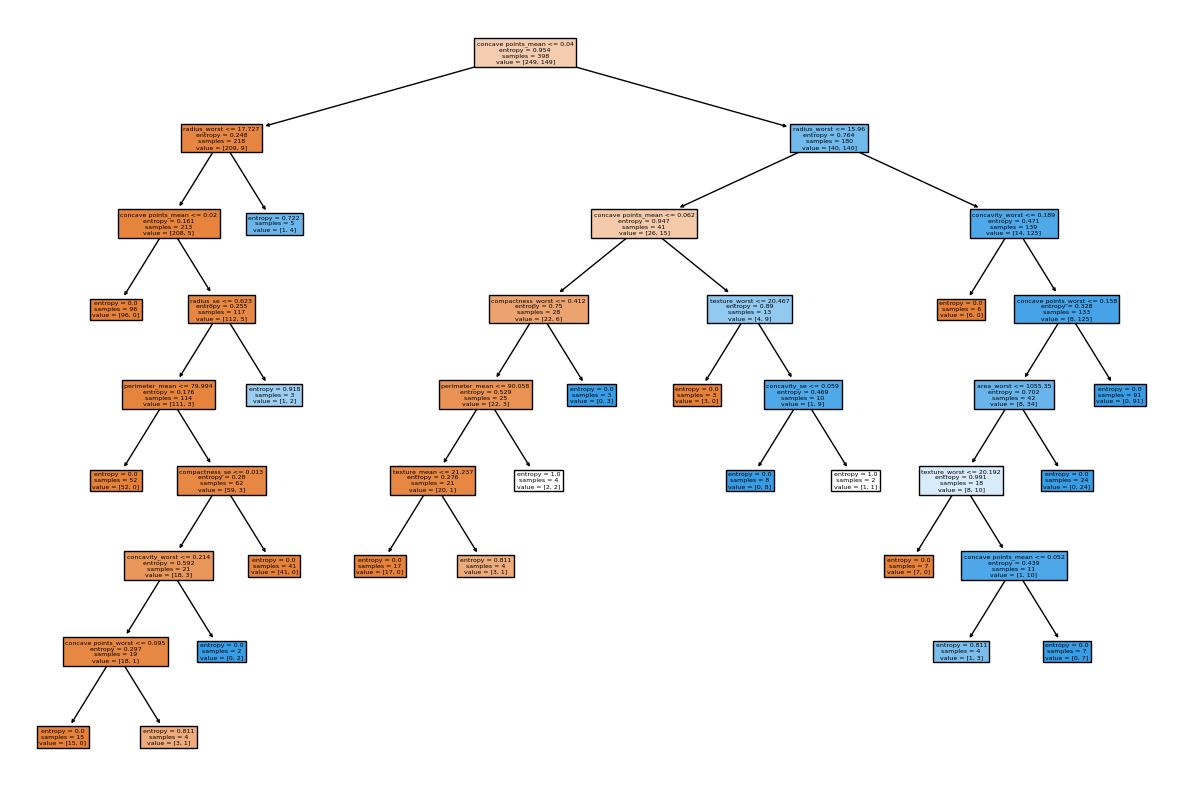

In [408]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)

Read: #https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [409]:
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # clf = DecisionTreeClassifier
ccp_alpha_values = pruning_path.ccp_alphas

In [410]:
ccp_alpha_values

array([0.        , 0.00399335, 0.00604739, 0.00641958, 0.00675868,
       0.00862793, 0.01202884, 0.01435018, 0.0173026 , 0.01763119,
       0.03099137, 0.03549229, 0.04094249, 0.05496803, 0.08343007,
       0.47242814])

In [411]:
clfs_list = []  # save models with diffrent ccp_alpha value
for ccp in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [412]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.003993352659045518, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006047387516658223, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006419576589874848, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006758683256012092, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00862793379793314, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.012028844403926979, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014350184435176862, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.017302601474775314, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01763119048807507, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.030991367208617764, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.03549229443392196, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.04094249107720667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.05496803084950469, random_state=42),
 

In [413]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ]
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ]

In [414]:
train_scores

[1.0,
 0.992462311557789,
 0.9899497487437185,
 0.9874371859296482,
 0.9874371859296482,
 0.9824120603015075,
 0.9698492462311558,
 0.9698492462311558,
 0.9422110552763819,
 0.9422110552763819,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [415]:
test_scores

[0.9415204678362573,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9590643274853801,
 0.9298245614035088,
 0.9298245614035088,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [416]:
import matplotlib.pyplot as plt

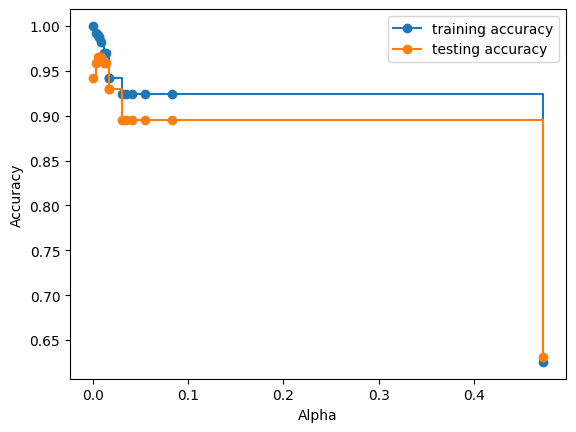

In [417]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
ax.legend()

In [418]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [419]:
pred = clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

In [420]:
clf.score(xtrain, ytrain)

0.9824120603015075

[Text(0.4230769230769231, 0.9, 'concave points_mean <= 0.051\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.15384615384615385, 0.7, 'radius_worst <= 16.83\ngini = 0.1\nsamples = 245\nvalue = [232, 13]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.043\nsamples = 230\nvalue = [225, 5]'),
 Text(0.23076923076923078, 0.5, 'texture_mean <= 16.19\ngini = 0.498\nsamples = 15\nvalue = [7, 8]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.6923076923076923, 0.7, 'texture_worst <= 20.405\ngini = 0.198\nsamples = 153\nvalue = [17, 136]'),
 Text(0.5384615384615384, 0.5, 'radius_worst <= 18.145\ngini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6153846153846154, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.5, 'area_worst <= 718.65\ngini = 0.096\nsamples = 139\n

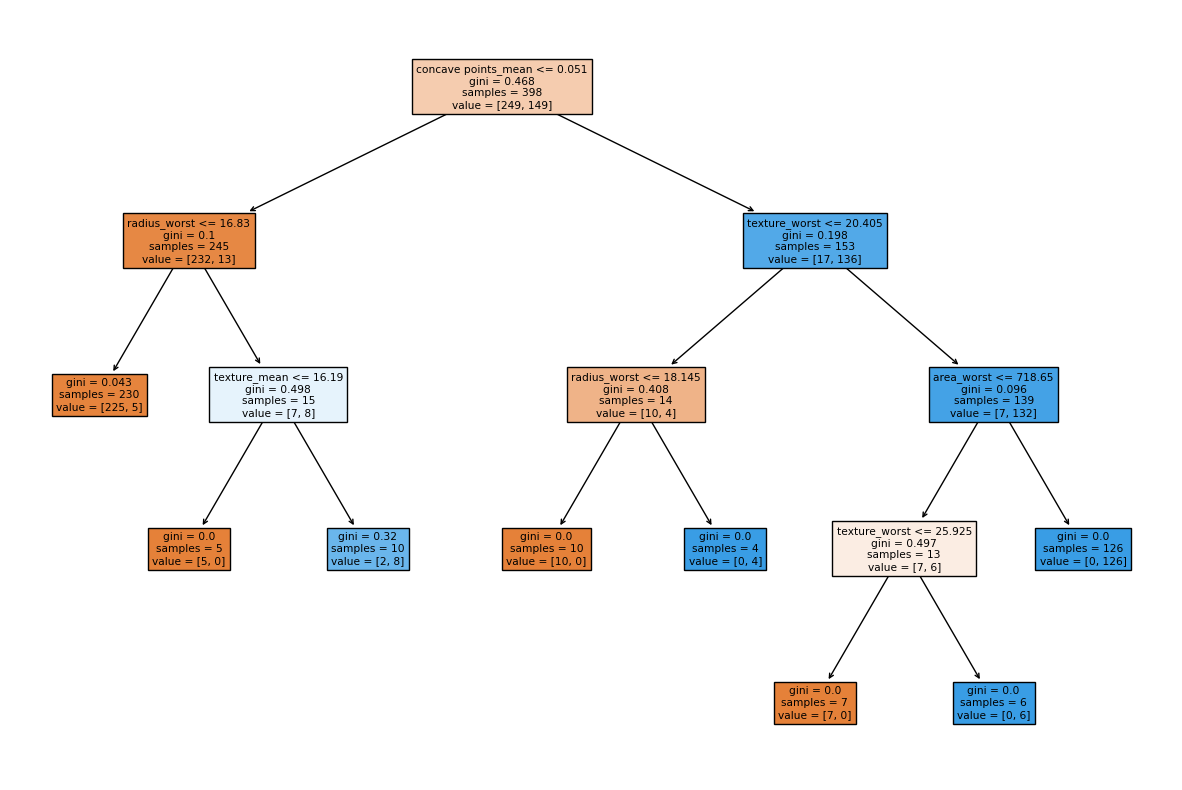

In [421]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = x.columns)

# XGBoost

In [422]:
# random & grid
# before performance & after performance

In [423]:
pip install xgboost

In [424]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable to numerical labels (0: Benign, 1: Malignant)
le = LabelEncoder()
y = le.fit_transform(y)

In [425]:
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=1, test_size=0.3)

In [426]:
# XGBoost in Normal Form
xgb_model = XGBClassifier(random_state=42)

In [427]:
# Fit the model on the training data
xgb_model.fit(xtrain, ytrain)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [428]:
# Make predictions on the test data
y_pred_xgb = xgb_model.predict(xtest)

In [429]:
# Calculate accuracy
accuracy_xgb = accuracy_score(ytest, y_pred_xgb)

print("Accuracy using XGBoost in Normal Form:", accuracy_xgb)

Accuracy using XGBoost in Normal Form: 0.9415204678362573



**XGBoost with Hyperparameter Optimization (Pre-Pruning) using Grid Search**

In [430]:
# Define hyperparameters for XGBoost with pre-pruning
xgb_params_pre_prune = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4]
}

In [431]:
# XGBoost with GridSearchCV for pre-pruning
xgb_grid_search_pre_prune = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_params_pre_prune, cv=5)
xgb_grid_search_pre_prune.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4]})

In [432]:
# Get the best XGBoost estimator from GridSearchCV for pre-pruning
best_xgb_estimator_pre_prune = xgb_grid_search_pre_prune.best_estimator_

In [433]:
# Make predictions on the test data using the best XGBoost model for pre-pruning
y_pred_xgb_pre_prune = best_xgb_estimator_pre_prune.predict(xtest)

In [434]:
# Calculate accuracy for pre-pruning
accuracy_xgb_pre_prune_grid = accuracy_score(ytest, y_pred_xgb_pre_prune)

In [435]:
print("Best Parameters using GridSearchCV for XGBoost with Pre-Pruning:", xgb_grid_search_pre_prune.best_params_)
print("Accuracy using XGBoost with Pre-Pruning:", accuracy_xgb_pre_prune_grid)

Best Parameters using GridSearchCV for XGBoost with Pre-Pruning: {'max_depth': 4, 'min_child_weight': 1}
Accuracy using XGBoost with Pre-Pruning: 0.9415204678362573


In [436]:
# Define hyperparameters for XGBoost with pre-pruning (Randomized Search)
import numpy as np
xgb_params_pre_prune = {
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1)
}

In [437]:
# XGBoost with RandomizedSearchCV for pre-pruning
xgb_random_search_pre_prune = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_params_pre_prune, cv=5, n_iter=50, random_state=42)
xgb_random_search_pre_prune.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42)

In [438]:
# Get the best XGBoost estimator from RandomizedSearchCV for pre-pruning
best_xgb_estimator_pre_prune_randomized = xgb_random_search_pre_prune.best_estimator_


In [439]:
# Make predictions on the test data using the best XGBoost model for pre-pruning
y_pred_xgb_pre_prune_randomized = best_xgb_estimator_pre_prune_randomized.predict(xtest)

In [440]:
# Calculate accuracy for pre-pruning
accuracy_xgb_pre_prune_randomized = accuracy_score(ytest, y_pred_xgb_pre_prune_randomized)

print("Best Parameters using RandomizedSearchCV for XGBoost with Pre-Pruning:", xgb_random_search_pre_prune.best_params_)
print("Accuracy using XGBoost with Pre-Pruning:", accuracy_xgb_pre_prune_randomized)

Best Parameters using RandomizedSearchCV for XGBoost with Pre-Pruning: {'subsample': 0.6, 'min_child_weight': 2, 'max_depth': 7, 'gamma': 0.1, 'colsample_bytree': 0.7999999999999999}
Accuracy using XGBoost with Pre-Pruning: 0.9649122807017544


In [441]:
# Define hyperparameters for XGBoost with post-pruning (Grid Search)
xgb_params_post_prune = {
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [442]:
# XGBoost with GridSearchCV for post-pruning
xgb_grid_search_post_prune = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=xgb_params_post_prune, cv=5)
xgb_grid_search_post_prune.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 2, 3, 4],
                         'subsample': [0.7, 0.8, 0.9]})

In [443]:
# Get the best XGBoost estimator from GridSearchCV for post-pruning
best_xgb_estimator_post_prune = xgb_grid_search_post_prune.best_estimator_

In [444]:
# Make predictions on the test data using the best XGBoost model for post-pruning
y_pred_xgb_post_prune = best_xgb_estimator_post_prune.predict(xtest)

In [445]:
# Calculate accuracy for post-pruning
accuracy_xgb_post_prune_grid = accuracy_score(ytest, y_pred_xgb_post_prune)

print("Best Parameters using GridSearchCV for XGBoost with Post-Pruning:", xgb_grid_search_post_prune.best_params_)
print("Accuracy using XGBoost with Post-Pruning:", accuracy_xgb_post_prune_grid)

Best Parameters using GridSearchCV for XGBoost with Post-Pruning: {'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.7}
Accuracy using XGBoost with Post-Pruning: 0.9415204678362573


In [446]:
# Define hyperparameters for XGBoost with post-pruning
xgb_params_post_prune = {
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]
}

In [447]:
# XGBoost with RandomizedSearchCV for post-pruning
xgb_random_search_post_prune = RandomizedSearchCV(estimator=XGBClassifier(random_state=42), param_distributions=xgb_params_post_prune, cv=5, n_iter=10, random_state=42)
xgb_random_search_post_prune.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'reg_alpha': [0, 0.1, 0.2, 0.3, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2, 0.3, 0.4]},
                   random_state=42)

In [448]:
# Get the best XGBoost estimator from RandomizedSearchCV for post-pruning
best_xgb_estimator_post_prune = xgb_random_search_post_prune.best_estimator_

In [449]:
# Make predictions on the test data using the best XGBoost model for post-pruning
y_pred_xgb_post_prune = best_xgb_estimator_post_prune.predict(xtest)

In [450]:
# Calculate accuracy for post-pruning
accuracy_xgb_post_prune_randomized = accuracy_score(ytest, y_pred_xgb_post_prune)

In [451]:
print("Best Parameters using RandomizedSearchCV for XGBoost with Post-Pruning:", xgb_random_search_post_prune.best_params_)
print("Accuracy using XGBoost with Post-Pruning:", accuracy_xgb_post_prune_randomized)

Best Parameters using RandomizedSearchCV for XGBoost with Post-Pruning: {'reg_lambda': 0.1, 'reg_alpha': 0, 'gamma': 0.3}
Accuracy using XGBoost with Post-Pruning: 0.9473684210526315


In [452]:
# Print the accuracies for pre-pruning and post-pruning
print("Accuracy using XGBoost in Normal Form:", accuracy_xgb)
print("Accuracy of XGBoost with Pre-Pruning (Grid Search):", accuracy_xgb_pre_prune_grid)
print("Accuracy of XGBoost with Pre-Pruning (Randomized Search):", accuracy_xgb_pre_prune_randomized)
print("Accuracy of XGBoost with Post-Pruning (Grid Search):", accuracy_xgb_post_prune_grid)
print("Accuracy of XGBoost with Post-Pruning (Randomized Search):", accuracy_xgb_post_prune_randomized)

Accuracy using XGBoost in Normal Form: 0.9415204678362573
Accuracy of XGBoost with Pre-Pruning (Grid Search): 0.9415204678362573
Accuracy of XGBoost with Pre-Pruning (Randomized Search): 0.9649122807017544
Accuracy of XGBoost with Post-Pruning (Grid Search): 0.9415204678362573
Accuracy of XGBoost with Post-Pruning (Randomized Search): 0.9473684210526315


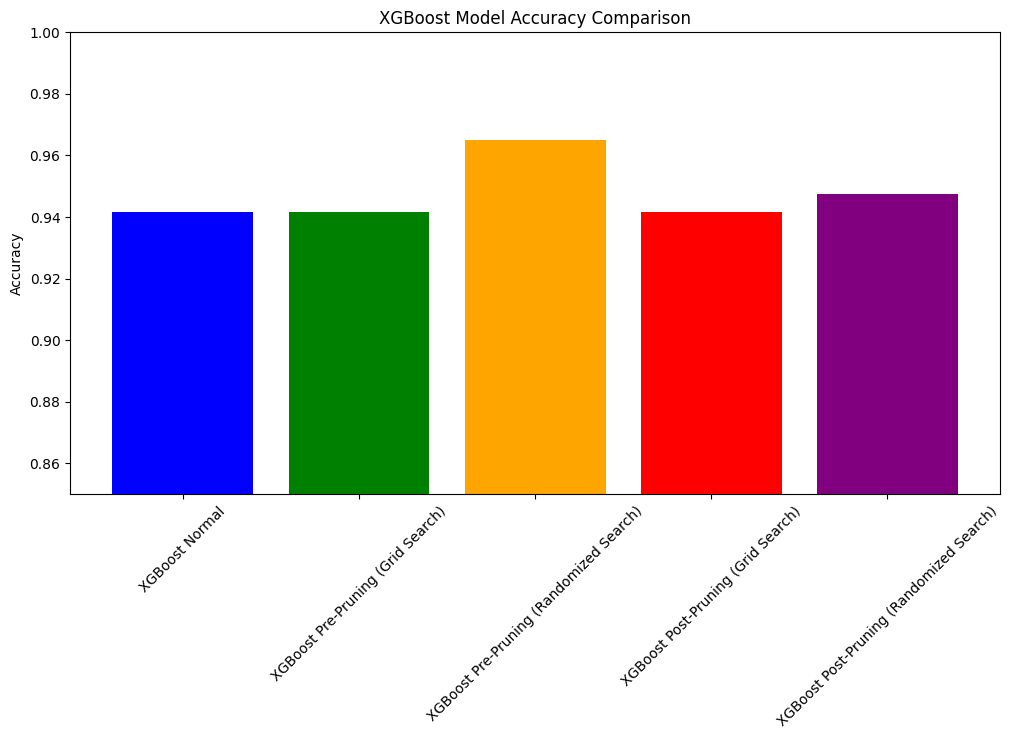

In [453]:
# Define the accuracies for different scenarios
accuracies = [accuracy_xgb,
              accuracy_xgb_pre_prune_grid,
              accuracy_xgb_pre_prune_randomized,
              accuracy_xgb_post_prune_grid,
              accuracy_xgb_post_prune_randomized]

# Define the labels for different scenarios
labels = ['XGBoost Normal',
          'XGBoost Pre-Pruning (Grid Search)',
          'XGBoost Pre-Pruning (Randomized Search)',
          'XGBoost Post-Pruning (Grid Search)',
          'XGBoost Post-Pruning (Randomized Search)']

# Plotting the Accuracies for all scenarios
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x1000 with 0 Axes>

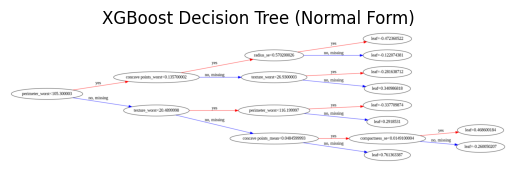

In [454]:

from xgboost import plot_tree

# XGBoost in Normal Form
# Plot the tree of the XGBoost model
plt.figure(figsize=(20, 10)) #width, height
plot_tree(xgb_model, num_trees=0, rankdir='LR')
plt.title("XGBoost Decision Tree (Normal Form)")
plt.show()

Text(0.5, 1.0, 'XGBoost Pre-Pruning (Grid Search)')

<Figure size 2000x1000 with 0 Axes>

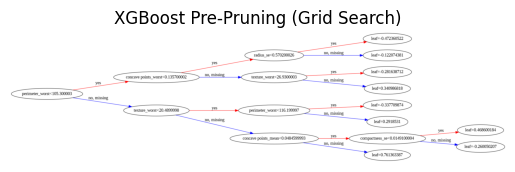

In [455]:
# XGBoost with Pre-Pruning (Grid Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_pre_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Pre-Pruning (Grid Search)")

<Figure size 2000x1000 with 0 Axes>

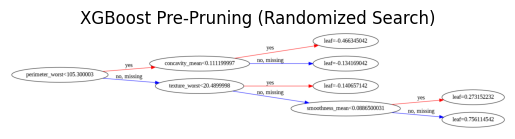

<Figure size 2000x1000 with 0 Axes>

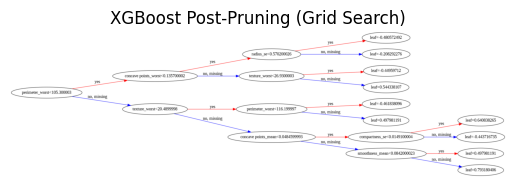

<Figure size 2000x1000 with 0 Axes>

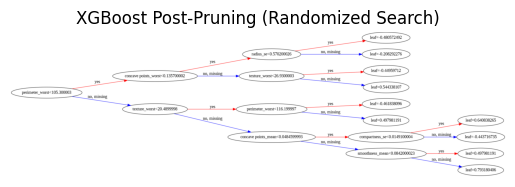

In [456]:
# XGBoost with Pre-Pruning (Randomized Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_pre_prune_randomized, num_trees=0, rankdir='LR')
plt.title("XGBoost Pre-Pruning (Randomized Search)")

# XGBoost with Post-Pruning (Grid Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_post_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Post-Pruning (Grid Search)")

# XGBoost with Post-Pruning (Randomized Search)
plt.figure(figsize=(20, 10))
plot_tree(best_xgb_estimator_post_prune, num_trees=0, rankdir='LR')
plt.title("XGBoost Post-Pruning (Randomized Search)")

plt.show()

# ADA Boost

In [457]:
# random & grid
# before performance & after performance

In [458]:
# AdaBoost in Normal
from sklearn.ensemble import AdaBoostClassifier
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.3)

In [459]:
# Create and train the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=42)

In [460]:
# Make predictions on the test data
y_pred_adaboost = adaboost_model.predict(xtest)

In [461]:
# Calculate accuracy
accuracy_adaboost = accuracy_score(ytest, y_pred_adaboost)
print("Accuracy using AdaBoost in Normal Form:", accuracy_adaboost)

Accuracy using AdaBoost in Normal Form: 0.9766081871345029


In [462]:
# Define hyperparameters for the AdaBoost model
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [None, 10, 20, 30]],
}

In [463]:
# Create and train the AdaBoost model with GridSearchCV for pre-pruning
adaboost_pre_prune_grid = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                       param_grid=adaboost_params, cv=5)
adaboost_pre_prune_grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=42),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=20,
                                                                   random_state=42),
                                            DecisionTreeClassifier(max_depth=30,
                                                                   random_state=42)],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]})

In [464]:
# Get the best AdaBoost model
adaboost_pre_prune_best = adaboost_pre_prune_grid.best_estimator_

In [465]:
# Make predictions on the test data
y_pred_adaboost_pre_prune_grid = adaboost_pre_prune_best.predict(xtest)

In [466]:
# Calculate accuracy
accuracy_adaboost_pre_prune_grid = accuracy_score(ytest, y_pred_adaboost_pre_prune_grid)
print("Accuracy using AdaBoost with Pre-Pruning (GridSearchCV):", accuracy_adaboost_pre_prune_grid)

Accuracy using AdaBoost with Pre-Pruning (GridSearchCV): 0.9298245614035088


In [467]:
from scipy.stats import randint  # Import randint from scipy.stats

# Define hyperparameters for the AdaBoost model
adaboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'base_estimator': [DecisionTreeClassifier(max_depth=d, random_state=42) for d in [None, 10, 20, 30]],
}

In [468]:
# Create and train the AdaBoost model with RandomizedSearchCV for pre-pruning
adaboost_pre_prune_random = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=42),
                                              param_distributions=adaboost_params,
                                              n_iter=100, cv=5, random_state=42)
adaboost_pre_prune_random.fit(xtrain, ytrain)


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'base_estimator': [DecisionTreeClassifier(random_state=42),
                                                           DecisionTreeClassifier(max_depth=10,
                                                                                  random_state=42),
                                                           DecisionTreeClassifier(max_depth=20,
                                                                                  random_state=42),
                                                           DecisionTreeClassifier(max_depth=30,
                                                                                  random_state=42)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42)

In [469]:
# Get the best AdaBoost model
adaboost_pre_prune_random_best = adaboost_pre_prune_random.best_estimator_

In [470]:
# Make predictions on the test data
y_pred_adaboost_pre_prune_random = adaboost_pre_prune_random_best.predict(xtest)

# Calculate accuracy
accuracy_adaboost_pre_prune_random = accuracy_score(ytest, y_pred_adaboost_pre_prune_random)
print("Accuracy using AdaBoost with Pre-Pruning (RandomizedSearchCV):", accuracy_adaboost_pre_prune_random)

Accuracy using AdaBoost with Pre-Pruning (RandomizedSearchCV): 0.9298245614035088


In [471]:
# Print the accuracies for pre-pruning and post-pruning
print("Accuracy using ADABoost in Normal Form:", accuracy_adaboost)
print("Accuracy of ADABoost with Pre-Pruning (Grid Search):", accuracy_adaboost_pre_prune_grid)
print("Accuracy of ADABoost with Pre-Pruning (Randomized Search):", accuracy_adaboost_pre_prune_random)

Accuracy using ADABoost in Normal Form: 0.9766081871345029
Accuracy of ADABoost with Pre-Pruning (Grid Search): 0.9298245614035088
Accuracy of ADABoost with Pre-Pruning (Randomized Search): 0.9298245614035088


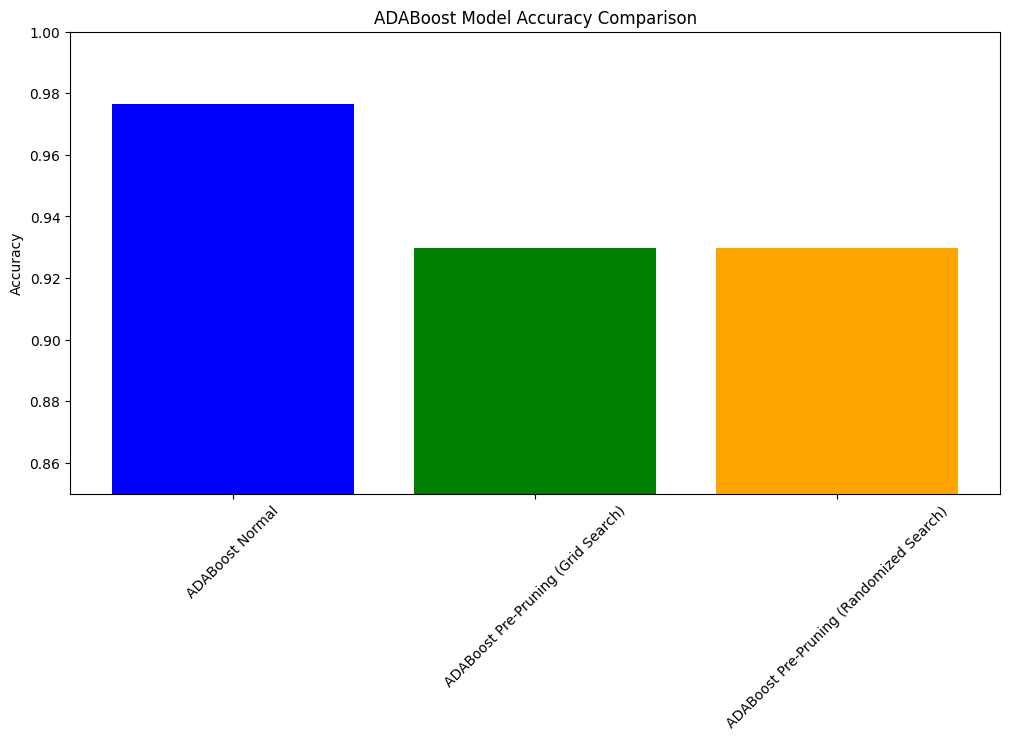

In [472]:
# Define the accuracies for different scenarios
accuracies = [accuracy_adaboost,
              accuracy_adaboost_pre_prune_grid,
              accuracy_adaboost_pre_prune_random]

# Define the labels for different scenarios
labels = ['ADABoost Normal',
          'ADABoost Pre-Pruning (Grid Search)',
          'ADABoost Pre-Pruning (Randomized Search)']

# Plotting the Accuracies for all scenarios
plt.figure(figsize=(12, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('ADABoost Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()

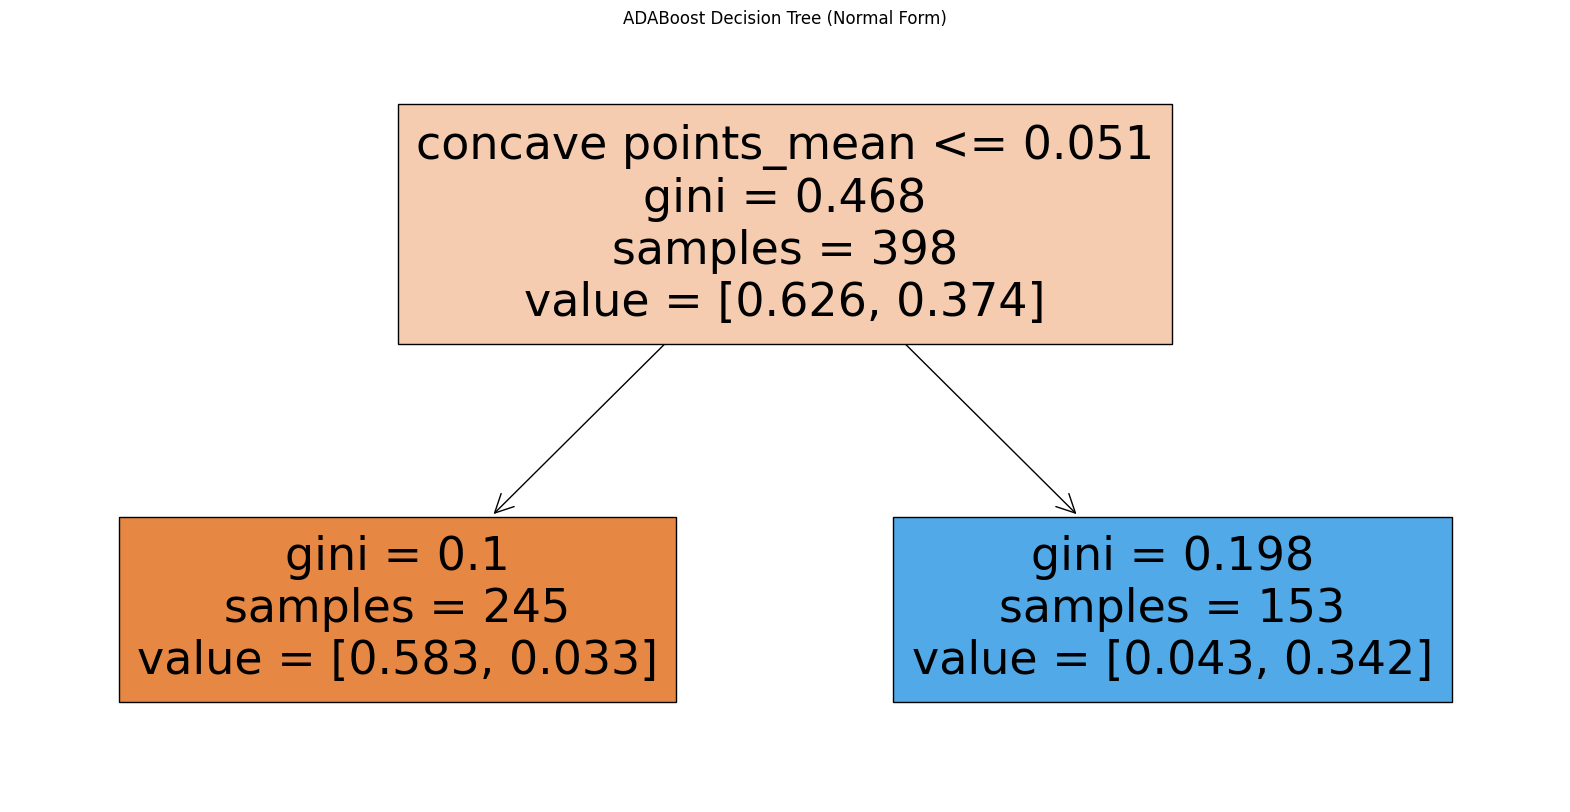

In [473]:
from sklearn.tree import plot_tree

# ADABoost in Normal Form
# Plot the tree of the ADABoost model
plt.figure(figsize=(20, 10))
plot_tree(adaboost_model.estimators_[0], filled=True, feature_names=x.columns)
plt.title("ADABoost Decision Tree (Normal Form)")
plt.show()

# CatBoost

In [474]:
# random & grid
# before performance & after performance

In [477]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.0 MB/s eta 0:00:00


In [478]:
from catboost import CatBoostClassifier

In [479]:
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(xtrain, ytrain)
y_pred_catboost = catboost_model.predict(xtest)

In [480]:
accuracy_catboost = accuracy_score(ytest, y_pred_catboost)
print("Accuracy using CatBoost in Normal Form:", accuracy_catboost)

Accuracy using CatBoost in Normal Form: 0.9766081871345029


In [482]:
catboost_params_pre_prune = {
    'iterations': [100, 200, 300],
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
    }

In [487]:
catboost_grid_search_pre_prune = GridSearchCV(estimator=CatBoostClassifier(random_state=42), param_grid=catboost_params_pre_prune, cv=5)
catboost_grid_search_pre_prune.fit(xtrain, ytrain)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.4738463	total: 4.66ms	remaining: 1.39s
1:	learn: 0.3363535	total: 9.46ms	remaining: 1.41s
2:	learn: 0.2390082	total: 14.2ms	remaining: 1.4s
3:	learn: 0.1863264	total: 19.3ms	remaining: 1.42s
4:	learn: 0.1408752	total: 24.1ms	remaining: 1.42s
5:	learn: 0.1161996	total: 29.1ms	remaining: 1.43s
6:	learn: 0.1043886	total: 34ms	remaining: 1.42s
7:	learn: 0.0872157	total: 39.4ms	remaining: 1.44s
8:	learn: 0.0755503	total: 44.3ms	remaining: 1.43s
9:	learn: 0.0645743	total: 49.2ms	remaining: 1.43s
10:	learn: 0.0585134	total: 54.1ms	remaining: 1.42s
11:	learn: 0.0524410	total: 58.8ms	remaining: 1.41s
12:	learn: 0.0461473	total: 63.6ms	remaining: 1.4s
13:	learn: 0.0403325	total: 68.5ms	remaining: 1.4s
14:	learn: 0.0376180	total: 73.2ms	remaining: 1.39s
15:	learn: 0.0352797	total: 77.9ms	remaining: 1.38s
16:	learn: 0.0316577	total: 82.7ms	remaining: 1.38s
17:	learn: 0.0309060	total: 87.6ms	remaining: 1.37s
18:	learn: 0.0285105	total: 

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f579137e5c0>,
             param_grid={'depth': [3, 4, 5], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2]})

In [488]:
best_catboost_estimator_pre_prune = catboost_grid_search_pre_prune.best_estimator_

In [489]:
y_pred_catboost_pre_prune = best_catboost_estimator_pre_prune.predict(xtest)

In [494]:
accuracy_catboost_pre_prune_grid = accuracy_score(ytest, y_pred_catboost_pre_prune)


In [495]:
print("Best Parameters using GridSearchCV for CatBoost with Pre-Pruning:", catboost_grid_search_pre_prune.best_params_)
print("Accuracy using CatBoost with Pre-Pruning:", accuracy_catboost_pre_prune_grid)

Best Parameters using GridSearchCV for CatBoost with Pre-Pruning: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Accuracy using CatBoost with Pre-Pruning: 0.9766081871345029


In [496]:
# Define the parameter grid for Randomized Search
param_dist = {
    'iterations': np.arange(100, 500, 100),
    'depth': np.arange(3, 10, 1),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'l2_leaf_reg': np.arange(1, 10, 1)
}

In [499]:
catboost_random_search_pre_prune_random = RandomizedSearchCV(estimator=CatBoostClassifier(random_state=42),param_distributions=catboost_params_pre_prune,n_iter=100, cv=5, random_state=42)
catboost_random_search_pre_prune_random.fit(xtrain, ytrain)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.4738463	total: 7.31ms	remaining: 2.19s
1:	learn: 0.3363535	total: 12.1ms	remaining: 1.8s
2:	learn: 0.2390082	total: 17ms	remaining: 1.69s
3:	learn: 0.1863264	total: 22.1ms	remaining: 1.64s
4:	learn: 0.1408752	total: 26.8ms	remaining: 1.58s
5:	learn: 0.1161996	total: 31.6ms	remaining: 1.55s
6:	learn: 0.1043886	total: 36.5ms	remaining: 1.53s
7:	learn: 0.0872157	total: 41.3ms	remaining: 1.51s
8:	learn: 0.0755503	total: 46.2ms	remaining: 1.49s
9:	learn: 0.0645743	total: 51.1ms	remaining: 1.48s
10:	learn: 0.0585134	total: 56.2ms	remaining: 1.48s
11:	learn: 0.0524410	total: 61ms	remaining: 1.46s
12:	learn: 0.0461473	total: 65.8ms	remaining: 1.45s
13:	learn: 0.0403325	total: 70.6ms	remaining: 1.44s
14:	learn: 0.0376180	total: 75.4ms	remaining: 1.43s
15:	learn: 0.0352797	total: 80.1ms	remaining: 1.42s
16:	learn: 0.0316577	total: 85ms	remaining: 1.42s
17:	learn: 0.0309060	total: 89.9ms	remaining: 1.41s
18:	learn: 0.0285105	total: 94

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f57734e4af0>,
                   n_iter=100,
                   param_distributions={'depth': [3, 4, 5],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.01, 0.1, 0.2]},
                   random_state=42)

In [500]:
best_catboost_estimator_pre_prune_random = catboost_random_search_pre_prune_random.best_estimator_

In [501]:
y_pred_catboost_pre_prune_random = best_catboost_estimator_pre_prune_random.predict(xtest)

In [502]:
accuracy_catboost_pre_prune_random = accuracy_score(ytest, y_pred_catboost_pre_prune_random)

In [503]:
print("Best Parameters using RandomizedSearchCV for CatBoost with Pre-Pruning:", catboost_random_search_pre_prune_random.best_params_)
print("Accuracy using CatBoost with Pre-Pruning:", accuracy_catboost_pre_prune_random)

Best Parameters using RandomizedSearchCV for CatBoost with Pre-Pruning: {'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 3}
Accuracy using CatBoost with Pre-Pruning: 0.9766081871345029


In [505]:
catboost_params_post_prune={
    'iterations': [100, 200, 300],
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [506]:
catboost_grid_search_post_prune = GridSearchCV(estimator=CatBoostClassifier(random_state=42), param_grid=catboost_params_post_prune, cv=5)
catboost_grid_search_post_prune.fit(xtrain, ytrain)

Streaming output truncated to the last 5000 lines.
100:	learn: 0.0028336	total: 546ms	remaining: 535ms
101:	learn: 0.0028177	total: 551ms	remaining: 529ms
102:	learn: 0.0028141	total: 555ms	remaining: 523ms
103:	learn: 0.0028141	total: 560ms	remaining: 517ms
104:	learn: 0.0028066	total: 564ms	remaining: 511ms
105:	learn: 0.0027653	total: 569ms	remaining: 505ms
106:	learn: 0.0027653	total: 574ms	remaining: 499ms
107:	learn: 0.0027578	total: 579ms	remaining: 493ms
108:	learn: 0.0027578	total: 583ms	remaining: 487ms
109:	learn: 0.0027393	total: 588ms	remaining: 481ms
110:	learn: 0.0026848	total: 593ms	remaining: 475ms
111:	learn: 0.0026848	total: 598ms	remaining: 470ms
112:	learn: 0.0026787	total: 602ms	remaining: 464ms
113:	learn: 0.0026787	total: 607ms	remaining: 458ms
114:	learn: 0.0026675	total: 612ms	remaining: 452ms
115:	learn: 0.0026674	total: 620ms	remaining: 449ms
116:	learn: 0.0026553	total: 624ms	remaining: 443ms
117:	learn: 0.0026553	total: 629ms	remaining: 437ms
118:	learn: 0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f577366cd60>,
             param_grid={'depth': [3, 4, 5], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]})

In [507]:
y_pred_catboost_post_prune = catboost_grid_search_post_prune.predict(xtest)

In [508]:
accuracy_catboost_post_prune_grid = accuracy_score(ytest, y_pred_catboost_post_prune)

In [509]:
print("Best Parameters using GridSearchCV for CatBoost with Post-Pruning:", catboost_grid_search_post_prune.best_params_)
print("Accuracy using CatBoost with Post-Pruning:", accuracy_catboost_post_prune_grid)

Best Parameters using GridSearchCV for CatBoost with Post-Pruning: {'depth': 3, 'iterations': 200, 'learning_rate': 0.1}
Accuracy using CatBoost with Post-Pruning: 0.9766081871345029


In [510]:
catboost_params_post_prune = {
    'iterations': [100, 200, 300],
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [511]:
catboost_random_search_post_prune = RandomizedSearchCV(estimator=CatBoostClassifier(random_state=42), param_distributions=catboost_params_post_prune, cv=5, n_iter=10, random_state=42)
catboost_random_search_post_prune.fit(xtrain, ytrain)

Streaming output truncated to the last 5000 lines.
200:	learn: 0.0048190	total: 1.22s	remaining: 602ms
201:	learn: 0.0047693	total: 1.23s	remaining: 597ms
202:	learn: 0.0047518	total: 1.24s	remaining: 590ms
203:	learn: 0.0047517	total: 1.25s	remaining: 586ms
204:	learn: 0.0047050	total: 1.25s	remaining: 580ms
205:	learn: 0.0046342	total: 1.26s	remaining: 574ms
206:	learn: 0.0046342	total: 1.27s	remaining: 569ms
207:	learn: 0.0046342	total: 1.27s	remaining: 562ms
208:	learn: 0.0046342	total: 1.28s	remaining: 558ms
209:	learn: 0.0046338	total: 1.28s	remaining: 551ms
210:	learn: 0.0046338	total: 1.29s	remaining: 546ms
211:	learn: 0.0045783	total: 1.3s	remaining: 542ms
212:	learn: 0.0045341	total: 1.31s	remaining: 535ms
213:	learn: 0.0044573	total: 1.32s	remaining: 530ms
214:	learn: 0.0044547	total: 1.33s	remaining: 524ms
215:	learn: 0.0044388	total: 1.33s	remaining: 518ms
216:	learn: 0.0043689	total: 1.35s	remaining: 517ms
217:	learn: 0.0043196	total: 1.37s	remaining: 516ms
218:	learn: 0.

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f57735b26e0>,
                   param_distributions={'depth': [3, 4, 5],
                                        'iterations': [100, 200, 300],
                                        'learning_rate': [0.01, 0.1, 0.2]},
                   random_state=42)

In [512]:
best_catboost_estimator_post_prune_random = catboost_random_search_post_prune.best_estimator_

In [513]:
y_pred_catboost_post_prune = best_catboost_estimator_pre_prune_random.predict(xtest)

In [514]:
accuracy_catboost_post_prune_random = accuracy_score(ytest, y_pred_catboost_post_prune)

In [515]:
print("Best Parameters using RandomizedSearchCV for CatBoost with Post-Pruning:", catboost_random_search_post_prune.best_params_)
print("Accuracy using CatBoost with Post-Pruning:", accuracy_catboost_post_prune_random)

Best Parameters using RandomizedSearchCV for CatBoost with Post-Pruning: {'learning_rate': 0.2, 'iterations': 300, 'depth': 3}
Accuracy using CatBoost with Post-Pruning: 0.9766081871345029


In [516]:
print("Accuracy using CatBoost in Normal Form:", accuracy_catboost)
print("Accuracy of CatBoost with Pre-Pruning (Grid Search):", accuracy_catboost_pre_prune_grid)
print("Accuracy of CatBoost with Pre-Pruning (Randomized Search):", accuracy_catboost_pre_prune_random)
print("Accuracy of CatBoost with Post-Pruning (Grid Search):", accuracy_catboost_post_prune_grid)
print("Accuracy of CatBoost with Post-Pruning (Randomized Search):", accuracy_catboost_post_prune_random)

Accuracy using CatBoost in Normal Form: 0.9766081871345029
Accuracy of CatBoost with Pre-Pruning (Grid Search): 0.9766081871345029
Accuracy of CatBoost with Pre-Pruning (Randomized Search): 0.9766081871345029
Accuracy of CatBoost with Post-Pruning (Grid Search): 0.9766081871345029
Accuracy of CatBoost with Post-Pruning (Randomized Search): 0.9766081871345029


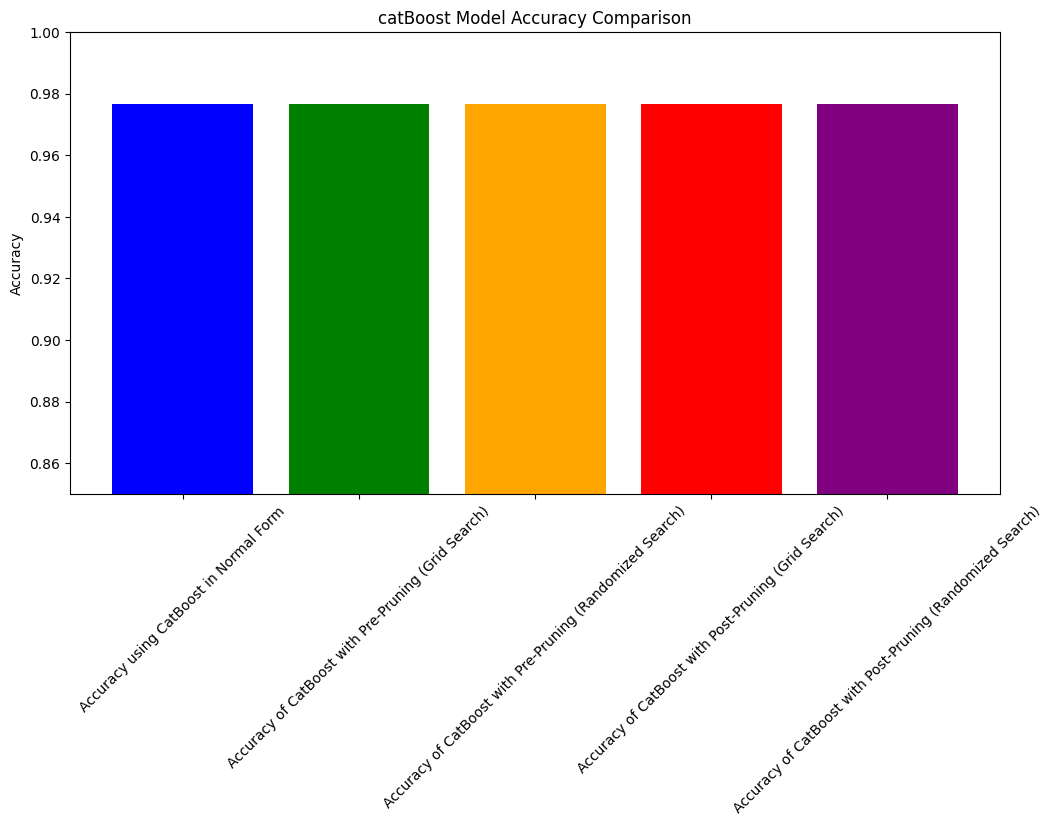

In [518]:
accuracies = [accuracy_catboost,
              accuracy_catboost_pre_prune_grid,
              accuracy_catboost_pre_prune_random,
              accuracy_catboost_post_prune_grid,
              accuracy_catboost_post_prune_random]

labels = ['Accuracy using CatBoost in Normal Form',
          'Accuracy of CatBoost with Pre-Pruning (Grid Search)',
          'Accuracy of CatBoost with Pre-Pruning (Randomized Search)',
          'Accuracy of CatBoost with Post-Pruning (Grid Search)',
          'Accuracy of CatBoost with Post-Pruning (Randomized Search)'
          ]

plt.figure(figsize=(12,6))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('catBoost Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.xticks(rotation=45)
plt.show()
